In [315]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [316]:
acoes = {
    # AGRO
    'acao1': 'SLCE3.SA',
    'acao2': 'AGRO3.SA',
    'acao3': 'VALE3.SA',
    'acao4': 'SMTO3.SA',
    'acao5': 'BRFS3.SA',
    
    # BANCARIO
    'acao6': 'BBAS3.SA',
    'acao7': 'ITUB4.SA',
    'acao8': 'BBDC4.SA',
    'acao9': 'SANB11.SA',
    'acao10': 'PETR4.SA',
    
    # TRANSPORTE
    'acao11': 'GOLL4.SA',
    'acao12': 'AZUL4.SA',
    'acao13': 'RAIL3.SA',
    'acao14': 'CCRO3.SA',
    'acao15': 'JSLG3.SA',
    
    # TECNOLOGICO
    'acao16': 'TOTS3.SA',
    'acao17': 'IGTI11.SA',
    'acao18': 'POSI3.SA',
    'acao19': 'LWSA3.SA',
    'acao20': 'BMOB3.SA'
}


In [317]:
tickers = {}
i = 1
for acao in acoes.values():
    tickers[f'ticker{i}'] = yf.Ticker(acao)
    i += 1


In [318]:
investimento_inicial = 1000
j = 1
datas = {}
for ticker in tickers.values():
    datas[f'data{j}'] = ticker.history(period='1y')
    j += 1

In [319]:
def ret_total(datas, data, inv_inicial):
    n_acoes = inv_inicial / datas[data].iloc[0]['Close']
    datas[data]['Valor investido'] = n_acoes * datas[data]['Close']
    ret_total = (datas[data].iloc[-1]['Valor investido'] / datas[data].iloc[0]['Valor investido'] - 1)
    return ret_total
def ret_diario(datas, data):
    ret = datas[data]['Valor investido'].pct_change()
    return ret
def desvio_padrao(datas, data):
    sigma = ret_diario(datas, data).std()
    return sigma
def sharpee(datas, data, inv_inicial):
    sharpee = (ret_total(datas, data, inv_inicial)) / (desvio_padrao(datas, data))
    return sharpee


In [320]:
#portifolio
#data 1
ret_total(datas, 'data1', 1000)
ret_diario(datas, 'data1')
desvio_padrao(datas, 'data1')
print(sharpee(datas, 'data1', 1000))
datap = pd.DataFrame()
datap['Valor investido'] = datas["data1"]['Valor investido']
datap


-0.5507742395092986


,Valor investido
Date,
2023-04-04 00:00:00-03:00,1000.000000
2023-04-05 00:00:00-03:00,962.247670
2023-04-06 00:00:00-03:00,968.973656
2023-04-10 00:00:00-03:00,981.774684
2023-04-11 00:00:00-03:00,1004.122300
...,...
2024-03-28 00:00:00-03:00,1007.398789
2024-04-01 00:00:00-03:00,1018.603391
2024-04-02 00:00:00-03:00,1009.435945


In [321]:
#correlacao portifolio com acao 1
df = pd.DataFrame()
df['portifolio'] = ret_diario(datas, 'data1')
for k in range(1,21):
    ret_total(datas, f'data{k}', 1000)
    df[f'acao{k}'] = ret_diario(datas, f'data{k}')
print(df.corr().sort_values(by='portifolio', ascending=False)['portifolio'])
sharpee1 = sharpee(datas, 'data1', 1000)
print(f'sharpee do portifolio é {sharpee1}')


portifolio    1.000000
acao1         1.000000
acao2         0.388290
acao17        0.333834
acao9         0.299252
acao20        0.276807
acao16        0.258548
acao3         0.253745
acao14        0.240227
acao7         0.229680
acao15        0.223403
acao13        0.218862
acao12        0.218311
acao4         0.213001
acao18        0.204802
acao19        0.190355
acao5         0.167028
acao6         0.139701
acao8         0.132235
acao11        0.132128
acao10       -0.022209
Name: portifolio, dtype: float64
sharpee do portifolio é -0.5507742395092986


In [322]:
#correlacao portifolio com acao 1 e 10
df['portifolio'] += ret_diario(datas, 'data10')
for k in range(1,21):
    ret_total(datas, f'data{k}', 1000)
    df[f'acao{k}'] = ret_diario(datas, f'data{k}')
print(df.corr().sort_values(by='portifolio', ascending=False)['portifolio'])
datap['Valor investido'] += datas["data10"]['Valor investido']
retp = datap['Valor investido'].pct_change()
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)
sigmap = retp.std()
sharpep = ret_totalp/sigmap
sharpee2 = sharpep
print(f'sharpee do portifolio é {sharpee2}')


portifolio    1.000000
acao10        0.760908
acao1         0.631801
acao2         0.368309
acao6         0.349363
acao3         0.339731
acao4         0.305723
acao9         0.305331
acao7         0.303491
acao16        0.261923
acao17        0.260578
acao19        0.239974
acao18        0.236797
acao13        0.234231
acao8         0.209147
acao11        0.194863
acao12        0.189910
acao20        0.186564
acao15        0.177324
acao5         0.159534
acao14        0.146514
Name: portifolio, dtype: float64
sharpee do portifolio é 37.51903660953714


In [323]:
#portifolio com acao 1, 10, 14
df['portifolio'] += ret_diario(datas, 'data14')
for k in range(1,21):
    ret_total(datas, f'data{k}', 1000)
    df[f'acao{k}'] = ret_diario(datas, f'data{k}')
print(df.corr().sort_values(by='portifolio', ascending=False)['portifolio'])
datap['Valor investido'] += datas["data14"]['Valor investido']
retp = datap['Valor investido'].pct_change()
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)
sigmap = retp.std()
sharpep = ret_totalp/sigmap
sharpee3 = sharpep
print(f'sharpee do portifolio é {sharpee3}')

portifolio    1.000000
acao1         0.632300
acao10        0.626051
acao14        0.570970
acao17        0.455264
acao9         0.452420
acao7         0.443899
acao6         0.439723
acao13        0.438439
acao2         0.432138
acao4         0.395249
acao16        0.381771
acao20        0.369180
acao12        0.361744
acao19        0.354953
acao3         0.353413
acao18        0.340429
acao8         0.313004
acao15        0.295582
acao11        0.287987
acao5         0.237846
Name: portifolio, dtype: float64
sharpee do portifolio é 34.70977446364127


In [324]:
#portifolio com acao 1, 10, 14, 5
df['portifolio'] += ret_diario(datas, 'data5')
for k in range(1,21):
    ret_total(datas, f'data{k}', 1000)
    df[f'acao{k}'] = ret_diario(datas, f'data{k}')
print(df.corr().sort_values(by='portifolio', ascending=False)['portifolio'])
datap['Valor investido'] += datas["data5"]['Valor investido']
retp = datap['Valor investido'].pct_change()
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)
sigmap = retp.std()
sharpep = ret_totalp/sigmap
sharpee4 = sharpep
print(f'sharpee do portifolio é {sharpee4}')

portifolio    1.000000
acao5         0.808367
acao14        0.501904
acao1         0.494162
acao4         0.480488
acao17        0.455697
acao13        0.453225
acao7         0.433579
acao9         0.424550
acao10        0.423235
acao12        0.419661
acao6         0.407203
acao20        0.402842
acao16        0.400717
acao2         0.395838
acao18        0.386787
acao19        0.368387
acao11        0.341649
acao3         0.317864
acao8         0.312221
acao15        0.281360
Name: portifolio, dtype: float64
sharpee do portifolio é 49.9466531000556


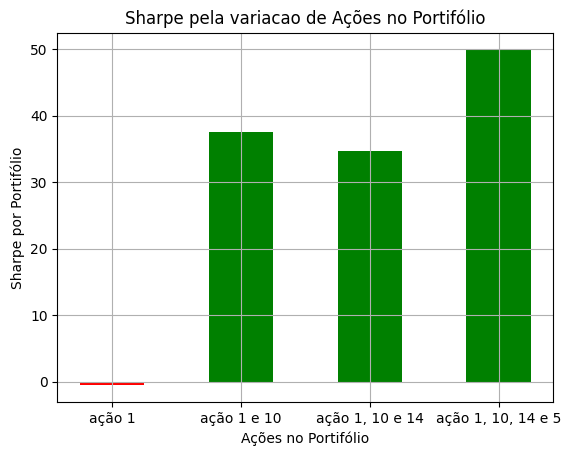

In [346]:
dados = [sharpee1, sharpee2, sharpee3, sharpee4]
acoes = ['ação 1', 'ação 1 e 10', 'ação 1, 10 e 14', 'ação 1, 10, 14 e 5']
sharp_df = pd.DataFrame()
sharp_df['sharpe'] = dados
sharp_df['acoes'] = acoes
c = ['red' if value < 0 else 'green' for value in dados]
plt.bar(acoes, dados, color = c, width=0.5)
plt.xlabel('Ações no Portifólio')
plt.ylabel('Sharpe por Portifólio')
plt.title('Sharpe pela variacao de Ações no Portifólio')
plt.grid()
